<a href="https://colab.research.google.com/github/Smartking1/Credit-Card-Fraud-detection/blob/main/Dog%20vs%20Cat%20prediction%20with%20fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai --upgrade

     |████████████████████████████████| 186 kB 4.3 MB/s 
     |████████████████████████████████| 56 kB 3.7 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
from fastai.vision.all import *

In [4]:
path = untar_data (URLs.PETS)/"images"

In [5]:
def is_cat(x): return x[0].isupper()

In [6]:
dls=ImageDataLoaders.from_name_func(
    path,get_image_files(path),valid_pct=0.2,seed=42,
    label_func=is_cat, item_tfms=Resize(224))


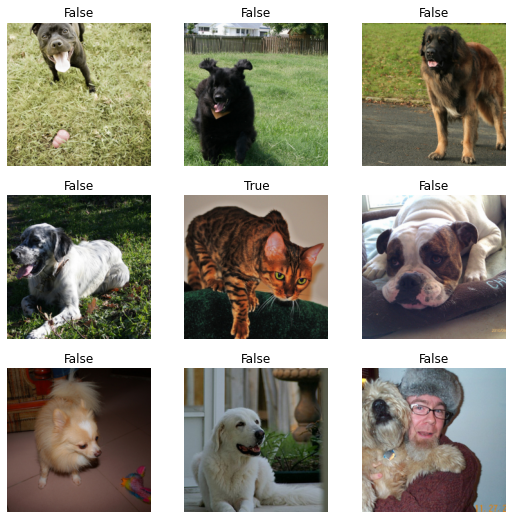

In [7]:
dls.show_batch()

In [8]:
learn =cnn_learner(dls,resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [9]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.153201,0.020198,0.006089,01:09


epoch,train_loss,valid_loss,error_rate,time
0,0.073060,0.018545,0.006766,01:15


In [10]:
import ipywidgets as widgets

In [11]:
uploader=widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

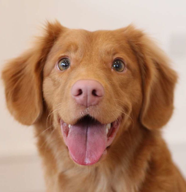

In [12]:
img=PILImage.create(uploader.data[0])
img.to_thumb(192)

In [13]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?:{is_cat}.")
print(f"Probability it's a cat:{probs[1].item():.6f}")

Is this a cat?:False.
Probability it's a cat:0.002362
